In [ ]:

import random
import time
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy.integrate import quad

In [ ]:
lmda = 2
n = 2
a = 3
S = [0, 6]

def u_a(x):
  return exp(-lmda * pow((x - a), n))

def u_a_comp(x):
  return 1 - exp(-lmda * pow((x - a), n))

def u_min(x):
  return (min(u_a(x), u_a_comp(x)))

def y_1(x):
  return 1

def comp_minus_u_a(x):
  return u_a_comp(x) - u_a(x)

def u_a_minus_comp(x):
  return u_a(x) - u_a_comp(x)


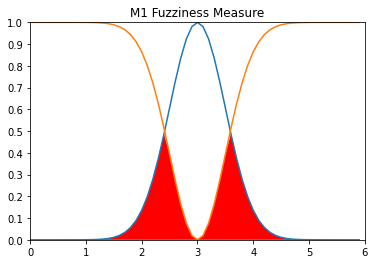

In [ ]:
x = np.arange(0, 6, 0.1)
y = np.array([u_a(i) for i in x])
y_comp = np.array([1 -u_a(i) for i in x])
f3 = np.minimum(y, y_comp)
fig, ax = plt.subplots()

ax.plot(x,y)
ax.plot(x,y_comp)
ax.axis([0, 6, 0, 1])
ax.fill_between(x, f3, facecolor='red', interpolate=True)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title("M1 Fuzziness Measure")
plt.show()

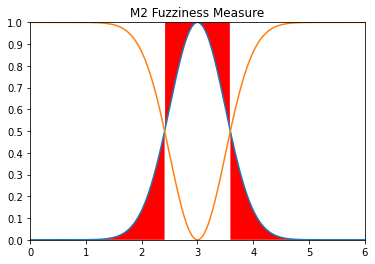

In [ ]:
x = np.arange(0, 6, 0.01)
y = np.array([u_a(i) for i in x])
y_comp = np.array([1 -u_a(i) for i in x])
f3 = np.maximum(y, y_comp)
f4 = []

f2 = np.array([1 for i in x])
fig, ax = plt.subplots()

for i in range(len(f3)):
  if y_comp[i] >= 0.5:
    f4.append(0)
  else:
    f4.append(f3[i])

f4 = np.array(f4)

ax.fill_between(x, y, where=(y < 0.5), facecolor='red')
ax.fill_between(x, f3, f2, where=(f4 >= 0.5), facecolor='red', interpolate=True)
ax.plot(x,y)
ax.plot(x,y_comp)
ax.axis([0, 6, 0, 1])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title("M2 Fuzziness Measure")
plt.show()

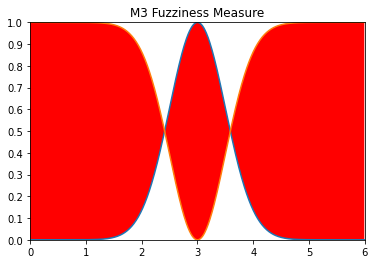

In [ ]:
x = np.arange(0, 6, 0.01)
y = np.array([u_a(i) for i in x])
y_comp = np.array([1 -u_a(i) for i in x])

fig, ax = plt.subplots()

ax.fill_between(x, y, y_comp, where=(y < 0.5), facecolor='red')
ax.fill_between(x, y, y_comp, where=(y_comp < y), facecolor='red')
ax.plot(x,y)
ax.plot(x,y_comp)
ax.axis([0, 6, 0, 1])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title("M3 Fuzziness Measure")
plt.show()

In [ ]:
### Areas

def u_a(x):
  return exp(-lmda * pow((x - a), n))

def u_a_comp(x):
  return 1 - exp(-lmda * pow((x - a), n))

def u_min(x):
  return (min(u_a(x), u_a_comp(x)))

# M1
M1, err = quad(u_min, 0, 6)
print(M1)

0.5232599803852603


In [ ]:
# M2

### Points of Intersection
x_poc_1 = 3 - sqrt(-0.5 * log(0.5))
x_poc_2 = 3 + sqrt(-0.5 * log(0.5))


a1, err = quad(u_a, 0, x_poc_1)
a2, err = quad(u_a, x_poc_2, 6)
a3, err = quad(u_a_comp, x_poc_1, x_poc_2)

M2 = a1 + a2 + a3
print(M2)


0.5232599803728408


In [ ]:
# M3

### Points of Intersection
x_poc_1 = 3 - sqrt(-0.5 * log(0.5))
x_poc_2 = 3 + sqrt(-0.5 * log(0.5))


a1, err = quad(comp_minus_u_a, 0, x_poc_1)
a2, err = quad(comp_minus_u_a, x_poc_2, 6)
a3, err = quad(u_a_minus_comp, x_poc_1, x_poc_2)

M3 = a1 + a2 + a3
print(M3)

4.953480039254319


In [ ]:
print("M1: ", M1)
print("M2: ", M2)
print("M3: ", M3)
print("R:  ", 0.5*(6- M3))

M1:  0.5232599803852603
M2:  0.5232599803728408
M3:  4.953480039254319
R:   0.5232599803728406


In [ ]:
print(isclose(M1, M2))

True


In [ ]:
print(isclose(M1, 0.5*(6 - M3)))

True
